In [7]:
import sys
import os
import math
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [8]:
InceptionV3 = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model1.keras')
VGG16 = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model2.keras')
ResNet152V2 = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model3.keras')
MobileNetV2 = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model4.keras')
Xception = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model5.keras')
EfficientNetV2L = tf.keras.models.load_model('/kaggle/input/model21/keras/models21/1/model6.keras')

In [9]:
train_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Training')
test_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Testing')
img_height = 224
img_width = 224
batch_size = 32

In [10]:
# Normalize the test dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 1311 files belonging to 4 classes.


In [11]:
test_images = []
test_labels = []

for images, labels in test_ds:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Function to evaluate and display metrics

41/41 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step
InceptionV3 Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      1.00      1.00       300
  meningioma       0.99      0.98      0.99       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.99      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



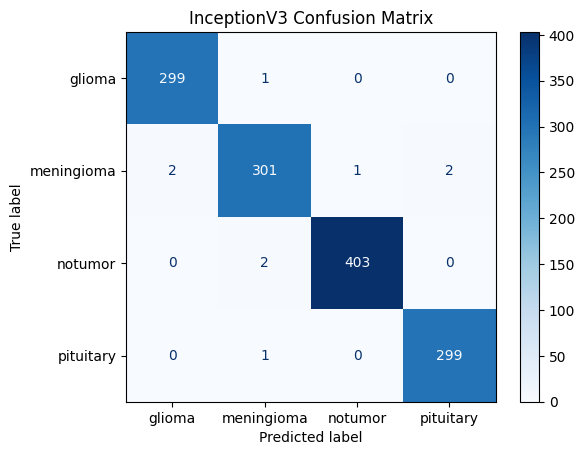

41/41 ━━━━━━━━━━━━━━━━━━━━ 431s 10s/step
VGG16 Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.98      0.98       300
  meningioma       0.96      0.98      0.97       306
     notumor       0.98      0.99      0.98       405
   pituitary       1.00      0.97      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



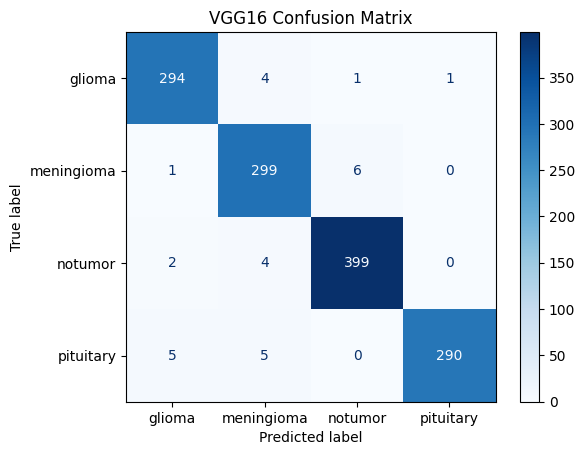

41/41 ━━━━━━━━━━━━━━━━━━━━ 314s 7s/step
ResNet152V2 Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.97      0.98       300
  meningioma       0.97      0.97      0.97       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.97      1.00      0.98       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



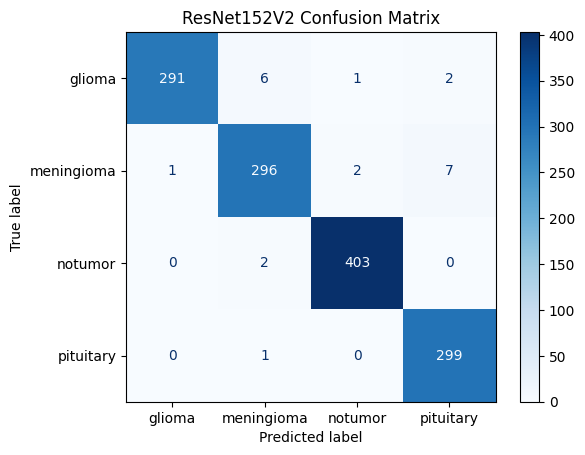

41/41 ━━━━━━━━━━━━━━━━━━━━ 461s 11s/step
MobileNetV2 Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.98      0.99       300
  meningioma       0.98      0.97      0.98       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



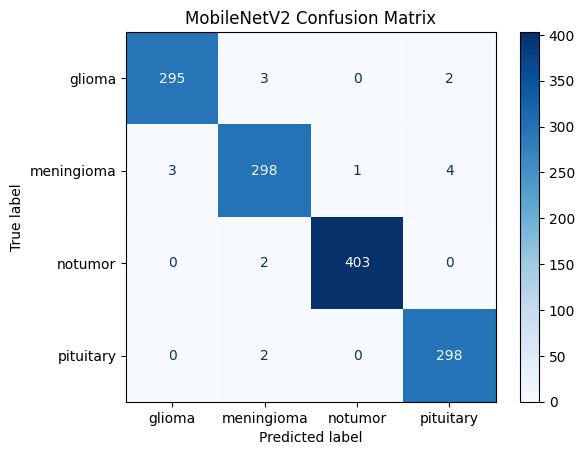

41/41 ━━━━━━━━━━━━━━━━━━━━ 1713s 42s/step
Xception Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.99      0.99       300
  meningioma       0.98      0.98      0.98       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.98      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



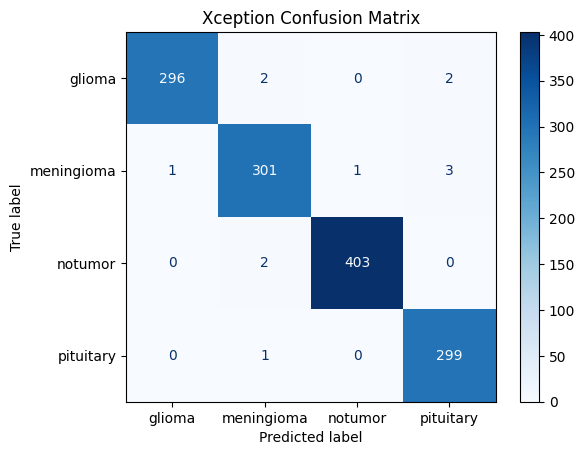

41/41 ━━━━━━━━━━━━━━━━━━━━ 3476s 84s/step
EfficientNetV2L Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       300
  meningioma       0.96      0.99      0.98       306
     notumor       0.99      0.99      0.99       405
   pituitary       1.00      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.98      0.99      1311
weighted avg       0.99      0.99      0.99      1311



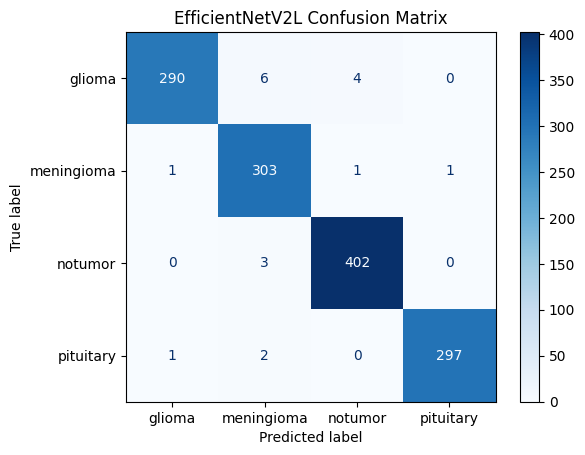

In [12]:
def evaluate_model(model, model_name):
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.shape[1] > 1 else (y_pred > 0.5).astype("int32")

    # Extract class names from the directory structure
    class_names = sorted([item.name for item in test_dir.glob('*/') if item.is_dir()])

    # Generate the classification report
    report = classification_report(test_labels, y_pred_classes, target_names=class_names)
    print(f"{model_name} Classification Report:")
    print(report)
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(test_labels, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate each model
evaluate_model(InceptionV3, "InceptionV3")
evaluate_model(VGG16, "VGG16")
evaluate_model(ResNet152V2, "ResNet152V2")
evaluate_model(MobileNetV2, "MobileNetV2")
evaluate_model(Xception, "Xception")
evaluate_model(EfficientNetV2L, "EfficientNetV2L")